# Notebook de préparation, nettoyage, analyse exploratoire

In [164]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import seaborn as sns

# Plan du notebook
1 disponibilité alimentaire 2017
* 1.1 Importation / observation des données
* 1.2 Traitement données dispo alimentaire  

2 Population 2000_2018
* 2.1 Importation / observation des données populations
* 2.2 Traitement du df population  

3 Première jointure df_vol (dispo ali) et df_var_pop (df_population)  

4 Revenu national brut par habitant
* 4.1 importation / observation données RNB
* 4.2 traitement df_rnb

5 Jointure entre df_uni (première jointure) et df_rnb

6 Stabilité politique
* 6.1 Import / observation df_stab_pol
* 6.2 Traitement df_stab_pol

7 Jointure df_stab_pol et df_uni_2 (résultat 2eme jointure)

8 Pourcentage de population ayant acces à une alimentation équilibrée
* 8.1 Import / observation %tage pop ayant acces à une alimentation équilibré
* 8.2 traitement du df_NoAcces_Gfood

9 jointure df_uni_3 (résultat précédente jointure) et df_acces_Gfood  

10 Etude des outliers
* 10.1 Visualisation des outliers avec des boxplots
* 10.2 Application du z-score sur la variable de la population pour détecter les valeurs abérrantes

# 1 Dispo alimentaire 2017

## 1.1 Importation/observation dispo alimentaire

In [237]:
#import df
df_dispo_ali = pd.read_csv("DisponibiliteAlimentaire_2017.csv")
df_dispo_ali

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.00,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.00,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.00,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.00,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.00,S,Données standardisées
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176595,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,5142,Nourriture,2899,Miscellanees,2017,2017,Milliers de tonnes,19.00,S,Données standardisées
176596,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,645,Disponibilité alimentaire en quantité (kg/pers...,2899,Miscellanees,2017,2017,kg,1.33,Fc,Donnée calculée
176597,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,664,Disponibilité alimentaire (Kcal/personne/jour),2899,Miscellanees,2017,2017,Kcal/personne/jour,1.00,Fc,Donnée calculée
176598,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,674,Disponibilité de protéines en quantité (g/pers...,2899,Miscellanees,2017,2017,g/personne/jour,0.04,Fc,Donnée calculée


* Observations :  

Ce df est fournie dans le cadre du projet. Il contient des données que de l'année 2017 concernant les ressources accessibles par pays d'un point de vue alimentaire.  
La colonne élément contient plusieurs données qualitatives qu'ils faudra observer plus en détail pour retenir que les éléments qui sont utiles à l'analyse.  
Idem pour la colonne produit où il faudra sélectionné que les produits utiles.  
Une attention particulière sera aussi apportée aux unités de mesures des différents éléments

In [238]:
# observation de la taille du dataframe
df_dispo_ali.shape

(176600, 14)

In [239]:
# observation des infos contenues dans le dataframe
df_dispo_ali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64

In [240]:
# observation de la description du dataframe
df_dispo_ali.describe().round(2)

,Code zone,Code Élément,Code Produit,Code année,Année,Valeur
count,176600.00,176600.00,176600.00,176600.0,176600.0,176600.00
mean,125.47,3810.05,2628.78,2017.0,2017.0,210.55
std,72.94,2211.79,91.99,0.0,0.0,4762.05
min,1.00,645.00,2511.00,2017.0,2017.0,-10388.00
25%,63.00,684.00,2556.00,2017.0,2017.0,0.00
50%,120.00,5142.00,2612.00,2017.0,2017.0,0.12
75%,188.00,5301.00,2732.00,2017.0,2017.0,8.46
max,276.00,5911.00,2899.00,2017.0,2017.0,758548.00


In [241]:
# vérification de la présence de valeurs nuls
df_dispo_ali.isnull().sum()

Code Domaine              0
Domaine                   0
Code zone                 0
Zone                      0
Code Élément              0
Élément                   0
Code Produit              0
Produit                   0
Code année                0
Année                     0
Unité                     0
Valeur                    0
Symbole                   0
Description du Symbole    0
dtype: int64

In [242]:
# vérif s'il y a des lignes en double
df_dispo_ali.duplicated().sum()

0

In [243]:
# combien y a t il de valeurs différentes dans les colonnes
df_dispo_ali.nunique()

Code Domaine                 1
Domaine                      1
Code zone                  174
Zone                       174
Code Élément                17
Élément                     17
Code Produit                98
Produit                     98
Code année                   1
Année                        1
Unité                        4
Valeur                    7250
Symbole                      2
Description du Symbole       2
dtype: int64

* Observation :  
176.600 lignes 14 colonnes  
pas de valeurs manquantes  
pas de doublon  
pas de valeurs uniques  

## 1.2 Sélection des données utiles dans dispo ali

In [244]:
# observation des différents produits disponible dans la variabel produit car c'est le marché des volailles qui nous intéresse
df_dispo_ali["Produit"].unique()

array(['Blé et produits', 'Riz et produits', 'Orge et produits',
       'Maïs et produits', 'Seigle et produits', 'Avoine',
       'Millet et produits', 'Sorgho et produits', 'Céréales, Autres',
       'Pommes de Terre et produits', 'Ignames', 'Racines nda',
       'Sucre, canne', 'Sucre, betterave', 'Sucre Eq Brut',
       'Edulcorants Autres', 'Miel', 'Haricots', 'Pois',
       'Légumineuses Autres et produits', 'Noix et produits', 'Soja',
       'Arachides Decortiquees', 'Graines de tournesol',
       'Graines Colza/Moutarde', 'Graines de coton', 'Coco (Incl Coprah)',
       'Sésame', 'Olives', 'Plantes Oleiferes, Autre', 'Huile de Soja',
       "Huile d'Arachide", 'Huile de Tournesol',
       'Huile de Colza&Moutarde', 'Huile Graines de Coton',
       'Huile de Palmistes', 'Huile de Palme', 'Huile de Coco',
       'Huile de Sésame', "Huile d'Olive", 'Huile de Son de Riz',
       'Huile de Germe de Maïs', 'Huil Plantes Oleif Autr',
       'Tomates et produits', 'Oignons', 'Légumes, 

In [245]:
# sélection que du produit volailles
df_vol = df_dispo_ali[df_dispo_ali["Produit"] == 'Viande de Volailles'][["Zone", "Élément", "Valeur"]]
df_vol

,Zone,Élément,Valeur
651,Afghanistan,Production,28.00
652,Afghanistan,Importations - Quantité,29.00
653,Afghanistan,Variation de stock,0.00
654,Afghanistan,Disponibilité intérieure,57.00
655,Afghanistan,Pertes,2.00
...,...,...,...
176396,Zimbabwe,Nourriture,67.00
176397,Zimbabwe,Disponibilité alimentaire en quantité (kg/pers...,4.68
176398,Zimbabwe,Disponibilité alimentaire (Kcal/personne/jour),16.00
176399,Zimbabwe,Disponibilité de protéines en quantité (g/pers...,1.59


In [246]:
# afin d'avoir acces à la liste  des éléments on fait un pivot de la table pour avoir en colonne
df_vol = df_vol.pivot(index="Zone", columns="Élément", values="Valeur")
df_vol

Élément,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,2.0,28.0,0.0,NaN,NaN,0.0
Afrique du Sud,0.0,NaN,NaN,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,NaN,NaN,-0.0
Albanie,NaN,NaN,NaN,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,NaN,13.0,0.0,NaN,NaN,4.0
Algérie,0.0,NaN,NaN,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,13.0,275.0,0.0,NaN,NaN,0.0
Allemagne,NaN,NaN,NaN,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,NaN,1514.0,-38.0,NaN,167.0,-29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,NaN,NaN,NaN,147.0,43.47,9.25,14.80,412.0,94.0,433.0,412.0,NaN,48.0,-0.0,NaN,NaN,-26.0
Équateur,0.0,NaN,NaN,83.0,19.31,6.35,6.15,341.0,0.0,0.0,324.0,17.0,340.0,0.0,NaN,NaN,-1.0
États-Unis d'Amérique,NaN,NaN,89.0,219.0,55.68,14.83,19.93,18266.0,3692.0,123.0,18100.0,NaN,21914.0,-0.0,NaN,77.0,80.0


In [247]:
# sélection des colonnes utile et rename
# tranformation de l'unité de mesure de millier de tonne à kilogramme
df_vol = df_vol[["Importations - Quantité", "Disponibilité alimentaire en quantité (kg/personne/an)"]].copy()
df_vol["Importations - Quantité"] = df_vol["Importations - Quantité"]*1000000
df_vol.rename(columns={"Importations - Quantité": "imp_vol_Kg", "Disponibilité alimentaire en quantité (kg/personne/an)": "dispo_ali_kg_par_pers_an"}, inplace= True)
df_vol

Élément,imp_vol_Kg,dispo_ali_kg_par_pers_an
Zone,,
Afghanistan,29000000.0,1.53
Afrique du Sud,514000000.0,35.69
Albanie,38000000.0,16.36
Algérie,2000000.0,6.38
Allemagne,842000000.0,19.47
...,...,...
Émirats arabes unis,433000000.0,43.47
Équateur,0.0,19.31
États-Unis d'Amérique,123000000.0,55.68


In [248]:
# vérification suite au modif
df_vol.info()

df_vol.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, Afghanistan to Îles Salomon
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   imp_vol_Kg                170 non-null    float64
 1   dispo_ali_kg_par_pers_an  172 non-null    float64
dtypes: float64(2)
memory usage: 4.0+ KB


Élément,imp_vol_Kg,dispo_ali_kg_par_pers_an
count,1.700000e+02,172.000000
mean,8.952941e+07,20.213372
std,1.866700e+08,15.860311
min,0.000000e+00,0.130000
25%,3.000000e+06,6.440000
50%,1.600000e+07,18.090000
75%,8.125000e+07,30.037500
max,1.069000e+09,72.310000


Afin de compléter le df nous allons récupérer des données utiles à l'étude sur le site de la FAO

# 2 population 2000_2018

## 2.1 Importation / oservation df population

In [249]:
# import des données
df_pop = pd.read_csv("Population_2000_2018.csv")
df_pop.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [250]:
# observation de la taille du dataframe
df_pop.shape

(4411, 15)

In [251]:
# observation des infos contenues dans le dataframe
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  Note                    258 non-null    

In [252]:
# observation de la description du dataframe
df_pop.describe().round(2)

,Code zone,Code Élément,Code Produit,Code année,Année,Valeur
count,4411.00,4411.0,4411.0,4411.00,4411.00,4411.00
mean,132.20,511.0,3010.0,2009.07,2009.07,29630.04
std,75.85,0.0,0.0,5.48,5.48,123802.86
min,1.00,511.0,3010.0,2000.00,2000.00,0.78
25%,68.00,511.0,3010.0,2004.00,2004.00,392.19
50%,132.00,511.0,3010.0,2009.00,2009.00,4764.74
75%,195.00,511.0,3010.0,2014.00,2014.00,18215.48
max,299.00,511.0,3010.0,2018.00,2018.00,1427647.79


In [253]:
# vérification de la présence de valeurs nuls
df_pop.isnull().sum()

Code Domaine                 0
Domaine                      0
Code zone                    0
Zone                         0
Code Élément                 0
Élément                      0
Code Produit                 0
Produit                      0
Code année                   0
Année                        0
Unité                        0
Valeur                       0
Symbole                      0
Description du Symbole       0
Note                      4153
dtype: int64

In [254]:
# vérif s'il y a des lignes en double
df_pop.duplicated().sum()

0

In [255]:
# combien y a t il de valeurs différentes dans les colonnes
df_pop.nunique()

Code Domaine                 1
Domaine                      1
Code zone                  238
Zone                       238
Code Élément                 1
Élément                      1
Code Produit                 1
Produit                      1
Code année                  19
Année                       19
Unité                        1
Valeur                    4398
Symbole                      2
Description du Symbole       2
Note                         1
dtype: int64

* Observations :  

4411 lignes et 15 colonnes  
pas de valeurs manquantes sauf dans la colonne note  
pas de valeur unique

## 2.2 traitement du df population

In [256]:
# changement de l'unité car en milliers de personnes
df_pop["Valeur"] *=1000

In [257]:
df_pop = df_pop.loc[df_pop["Année"].isin([2016,2017])][["Zone", "Année", "Valeur"]]
df_pop.head()

,Zone,Année,Valeur
16,Afghanistan,2016,35383032.0
17,Afghanistan,2017,36296113.0
35,Afrique du Sud,2016,56207646.0
36,Afrique du Sud,2017,57009756.0
54,Albanie,2016,2886438.0


In [258]:
df_pop_16_17 = df_pop.pivot(index="Zone", columns="Année", values="Valeur")
df_pop_16_17

Année,2016,2017
Zone,,
Afghanistan,35383032.0,36296113.0
Afrique du Sud,56207646.0,57009756.0
Albanie,2886438.0,2884169.0
Algérie,40551392.0,41389189.0
Allemagne,82193768.0,82658409.0
...,...,...
Îles Salomon,619438.0,636039.0
Îles Turques-et-Caïques,36559.0,37115.0
Îles Vierges américaines,104835.0,104751.0


In [259]:
df_pop_16_17["variation_pop"] = (df_pop_16_17[2017] - df_pop_16_17[2016]) / df_pop_16_17[2017] * 100
df_pop_16_17.columns = ["pop_2016", "pop", "variation_pop"]
df_pop_2017 = df_pop_16_17[["pop", "variation_pop"]].reset_index()
df_pop_2017

,Zone,pop,variation_pop
0,Afghanistan,36296113.0,2.515644
1,Afrique du Sud,57009756.0,1.406970
2,Albanie,2884169.0,-0.078671
3,Algérie,41389189.0,2.024193
4,Allemagne,82658409.0,0.562122
...,...,...,...
231,Îles Salomon,636039.0,2.610060
232,Îles Turques-et-Caïques,37115.0,1.498047
233,Îles Vierges américaines,104751.0,-0.080190
234,Îles Vierges britanniques,29577.0,0.750583


# 3 joiture enter df_vol (extrait dispo ali) et df_var_pop (extrait population)

In [260]:
# jointure des 2 df créé suit au premier traitement
df_uni = pd.merge(df_pop_2017, df_vol, on= "Zone", how="left")
df_uni

,Zone,pop,variation_pop,imp_vol_Kg,dispo_ali_kg_par_pers_an
0,Afghanistan,36296113.0,2.515644,29000000.0,1.53
1,Afrique du Sud,57009756.0,1.406970,514000000.0,35.69
2,Albanie,2884169.0,-0.078671,38000000.0,16.36
3,Algérie,41389189.0,2.024193,2000000.0,6.38
4,Allemagne,82658409.0,0.562122,842000000.0,19.47
...,...,...,...,...,...
231,Îles Salomon,636039.0,2.610060,6000000.0,4.45
232,Îles Turques-et-Caïques,37115.0,1.498047,NaN,NaN
233,Îles Vierges américaines,104751.0,-0.080190,NaN,NaN
234,Îles Vierges britanniques,29577.0,0.750583,NaN,NaN


In [261]:
# vérif données après jointure
df_uni.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 0 to 235
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Zone                      236 non-null    object 
 1   pop                       236 non-null    float64
 2   variation_pop             236 non-null    float64
 3   imp_vol_Kg                170 non-null    float64
 4   dispo_ali_kg_par_pers_an  172 non-null    float64
dtypes: float64(4), object(1)
memory usage: 11.1+ KB


In [262]:
df_uni.nunique()

Zone                        236
pop                         236
variation_pop               236
imp_vol_Kg                   84
dispo_ali_kg_par_pers_an    169
dtype: int64

# 4 revenue national brut par habitant

## 4.1 import/observation revenu national brut

In [263]:
# import RNB
df_rnb = pd.read_csv("RNB_par_hab.csv")
df_rnb

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,4,Afghanistan,6119,Valeur US $ par habitant,22011,Revenu national brut,2017,2017,US$,537.126294,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,710,Afrique du Sud,6119,Valeur US $ par habitant,22011,Revenu national brut,2017,2017,US$,6537.504869,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,8,Albanie,6119,Valeur US $ par habitant,22011,Revenu national brut,2017,2017,US$,4532.791976,X,Ciffre de sources internationales,NaN
3,MK,Indicateurs macro,12,Algérie,6119,Valeur US $ par habitant,22011,Revenu national brut,2017,2017,US$,4081.775086,X,Ciffre de sources internationales,NaN
4,MK,Indicateurs macro,276,Allemagne,6119,Valeur US $ par habitant,22011,Revenu national brut,2017,2017,US$,45734.557505,X,Ciffre de sources internationales,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,MK,Indicateurs macro,862,Venezuela (République bolivarienne du),6119,Valeur US $ par habitant,22011,Revenu national brut,2017,2017,US$,7704.542477,X,Ciffre de sources internationales,NaN
207,MK,Indicateurs macro,704,Viet Nam,6119,Valeur US $ par habitant,22011,Revenu national brut,2017,2017,US$,2199.039303,X,Ciffre de sources internationales,NaN
208,MK,Indicateurs macro,887,Yémen,6119,Valeur US $ par habitant,22011,Revenu national brut,2017,2017,US$,608.982554,X,Ciffre de sources internationales,NaN
209,MK,Indicateurs macro,894,Zambie,6119,Valeur US $ par habitant,22011,Revenu national brut,2017,2017,US$,1448.488895,X,Ciffre de sources internationales,NaN


In [264]:
# observation de la taille du dataframe
df_rnb.shape

(211, 15)

In [265]:
# observation des infos contenues dans le dataframe
df_rnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            211 non-null    object 
 1   Domaine                 211 non-null    object 
 2   Code zone (M49)         211 non-null    int64  
 3   Zone                    211 non-null    object 
 4   Code Élément            211 non-null    int64  
 5   Élément                 211 non-null    object 
 6   Code Produit            211 non-null    int64  
 7   Produit                 211 non-null    object 
 8   Code année              211 non-null    int64  
 9   Année                   211 non-null    int64  
 10  Unité                   211 non-null    object 
 11  Valeur                  211 non-null    float64
 12  Symbole                 211 non-null    object 
 13  Description du Symbole  211 non-null    object 
 14  Note                    0 non-null      fl

In [266]:
# observation de la description du dataframe
df_rnb.describe().round(2)

,Code zone (M49),Code Élément,Code Produit,Code année,Année,Valeur,Note
count,211.00,211.0,211.0,211.0,211.0,211.00,0.0
mean,429.41,6119.0,22011.0,2017.0,2017.0,16376.61,NaN
std,251.24,0.0,0.0,0.0,0.0,24806.37,NaN
min,4.00,6119.0,22011.0,2017.0,2017.0,295.78,NaN
25%,210.00,6119.0,22011.0,2017.0,2017.0,2015.64,NaN
50%,430.00,6119.0,22011.0,2017.0,2017.0,6339.89,NaN
75%,642.50,6119.0,22011.0,2017.0,2017.0,19664.24,NaN
max,894.00,6119.0,22011.0,2017.0,2017.0,178117.96,NaN


In [267]:
# combien y a t il de valeurs différentes dans les colonnes
df_rnb.nunique()

Code Domaine                1
Domaine                     1
Code zone (M49)           211
Zone                      211
Code Élément                1
Élément                     1
Code Produit                1
Produit                     1
Code année                  1
Année                       1
Unité                       1
Valeur                    211
Symbole                     1
Description du Symbole      1
Note                        0
dtype: int64

211 lignes 15 colonnes  
zone que des valeurs uniques (clef ok)

## 4.2 traitement df_rnb

In [268]:
# rename colonne et sélection colonnes utiles
df_rnb.rename(columns={"Valeur":"RNB_USD_par_hab"}, inplace=True)
df_rnb = df_rnb[["Zone", "RNB_USD_par_hab"]].copy()
df_rnb

,Zone,RNB_USD_par_hab
0,Afghanistan,537.126294
1,Afrique du Sud,6537.504869
2,Albanie,4532.791976
3,Algérie,4081.775086
4,Allemagne,45734.557505
...,...,...
206,Venezuela (République bolivarienne du),7704.542477
207,Viet Nam,2199.039303
208,Yémen,608.982554
209,Zambie,1448.488895


# 5 jointure entre df_uni (résultat première jointure) et df_rnb

In [269]:
# jointure rnb et le premier df jont
df_uni_2 = pd.merge(df_uni, df_rnb, on="Zone", how = "left")
df_uni_2

,Zone,pop,variation_pop,imp_vol_Kg,dispo_ali_kg_par_pers_an,RNB_USD_par_hab
0,Afghanistan,36296113.0,2.515644,29000000.0,1.53,537.126294
1,Afrique du Sud,57009756.0,1.406970,514000000.0,35.69,6537.504869
2,Albanie,2884169.0,-0.078671,38000000.0,16.36,4532.791976
3,Algérie,41389189.0,2.024193,2000000.0,6.38,4081.775086
4,Allemagne,82658409.0,0.562122,842000000.0,19.47,45734.557505
...,...,...,...,...,...,...
231,Îles Salomon,636039.0,2.610060,6000000.0,4.45,2237.997123
232,Îles Turques-et-Caïques,37115.0,1.498047,NaN,NaN,28076.291939
233,Îles Vierges américaines,104751.0,-0.080190,NaN,NaN,NaN
234,Îles Vierges britanniques,29577.0,0.750583,NaN,NaN,39663.163074


In [270]:
# visualisation dans zone pour voir s'il y a une difficulté concernant le non match de chine
df_chine = df_uni_2.loc[df_uni_2["Zone"].str.contains("Chine")]
df_chine

,Zone,pop,variation_pop,imp_vol_Kg,dispo_ali_kg_par_pers_an,RNB_USD_par_hab
41,Chine - RAS de Hong-Kong,7.306322e+06,0.859256,907000000.0,53.51,47724.637597
42,Chine - RAS de Macao,6.225850e+05,1.565891,23000000.0,34.47,70300.937271
43,"Chine, Taiwan Province de",2.367455e+07,0.238002,161000000.0,33.17,NaN
44,"Chine, continentale",1.421022e+09,0.490664,452000000.0,12.33,8717.698270


In [271]:
# complété RNB taiwan
df_uni_2.loc[df_uni_2.index[43],"RNB_USD_par_hab"] = 50500

la chine fait l'objet de plusieurs division et donc explique la situation 'Chine'  
on peut supprimer 'Chine' sans conséquence

In [272]:
# vérification que les modif sont bien passé
df_uni_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 0 to 235
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Zone                      236 non-null    object 
 1   pop                       236 non-null    float64
 2   variation_pop             236 non-null    float64
 3   imp_vol_Kg                170 non-null    float64
 4   dispo_ali_kg_par_pers_an  172 non-null    float64
 5   RNB_USD_par_hab           210 non-null    float64
dtypes: float64(5), object(1)
memory usage: 21.0+ KB


In [273]:
# vérif que Zone a bien des valeurs uniques pour les jointure suivante
df_uni_2["Zone"].nunique()

236

# 6 Stabilité politique

## 6.1 import / observation stabilité politique

In [274]:
# import csv
df_stab_pol = pd.read_csv("stabilite_pol.csv")
df_stab_pol

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,4,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-2.80,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,710,Afrique du Sud,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-0.28,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,8,Albanie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.38,X,Ciffre de sources internationales,NaN
3,FS,Données de la sécurité alimentaire,12,Algérie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-0.92,X,Ciffre de sources internationales,NaN
4,FS,Données de la sécurité alimentaire,276,Allemagne,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.59,X,Ciffre de sources internationales,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,FS,Données de la sécurité alimentaire,862,Venezuela (République bolivarienne du),6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-1.27,X,Ciffre de sources internationales,NaN
193,FS,Données de la sécurité alimentaire,704,Viet Nam,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.23,X,Ciffre de sources internationales,NaN
194,FS,Données de la sécurité alimentaire,887,Yémen,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-2.94,X,Ciffre de sources internationales,NaN
195,FS,Données de la sécurité alimentaire,894,Zambie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.15,X,Ciffre de sources internationales,NaN


In [275]:
df_stab_pol.shape

(197, 15)

In [276]:
df_stab_pol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            197 non-null    object 
 1   Domaine                 197 non-null    object 
 2   Code zone (M49)         197 non-null    int64  
 3   Zone                    197 non-null    object 
 4   Code Élément            197 non-null    int64  
 5   Élément                 197 non-null    object 
 6   Code Produit            197 non-null    int64  
 7   Produit                 197 non-null    object 
 8   Code année              197 non-null    int64  
 9   Année                   197 non-null    int64  
 10  Unité                   197 non-null    object 
 11  Valeur                  197 non-null    float64
 12  Symbole                 197 non-null    object 
 13  Description du Symbole  197 non-null    object 
 14  Note                    0 non-null      fl

In [277]:
df_stab_pol.describe()

,Code zone (M49),Code Élément,Code Produit,Code année,Année,Valeur,Note
count,197.000000,197.0,197.0,197.0,197.0,197.000000,0.0
mean,426.883249,6125.0,21032.0,2017.0,2017.0,-0.061777,NaN
std,255.157278,0.0,0.0,0.0,0.0,0.994815,NaN
min,4.000000,6125.0,21032.0,2017.0,2017.0,-2.940000,NaN
25%,208.000000,6125.0,21032.0,2017.0,2017.0,-0.650000,NaN
50%,422.000000,6125.0,21032.0,2017.0,2017.0,0.040000,NaN
75%,643.000000,6125.0,21032.0,2017.0,2017.0,0.770000,NaN
max,894.000000,6125.0,21032.0,2017.0,2017.0,1.920000,NaN


In [278]:
df_stab_pol.nunique()

Code Domaine                1
Domaine                     1
Code zone (M49)           197
Zone                      197
Code Élément                1
Élément                     1
Code Produit                1
Produit                     1
Code année                  1
Année                       1
Unité                       1
Valeur                    147
Symbole                     1
Description du Symbole      1
Note                        0
dtype: int64

197 lignes 15 colonne  
"Zone" valeur unique donc ok cle primaire

## 6.2 traitement df_stab_pol

In [279]:
# sélection des colonnes utiles
df_stab_pol = df_stab_pol[["Zone", "Valeur"]].copy()
df_stab_pol

,Zone,Valeur
0,Afghanistan,-2.80
1,Afrique du Sud,-0.28
2,Albanie,0.38
3,Algérie,-0.92
4,Allemagne,0.59
...,...,...
192,Venezuela (République bolivarienne du),-1.27
193,Viet Nam,0.23
194,Yémen,-2.94
195,Zambie,0.15


In [280]:
# rename colonne
df_stab_pol.rename(columns= {"Valeur":"indice_stab"}, inplace = True)
df_stab_pol

,Zone,indice_stab
0,Afghanistan,-2.80
1,Afrique du Sud,-0.28
2,Albanie,0.38
3,Algérie,-0.92
4,Allemagne,0.59
...,...,...
192,Venezuela (République bolivarienne du),-1.27
193,Viet Nam,0.23
194,Yémen,-2.94
195,Zambie,0.15


In [281]:
# vu après merge remplacement pour que ça correspondent afin que ça match
df_stab_pol["Zone"].replace("Pays-Bas (Royaume des)", "Pays-Bas", inplace=True)

# 7 jointure df_stab_pol et df_uni_2 (résultat 2eme jointure)

In [282]:
# jointure
df_uni_3 = pd.merge(df_uni_2, df_stab_pol, on= "Zone", how= "left")
df_uni_3

,Zone,pop,variation_pop,imp_vol_Kg,dispo_ali_kg_par_pers_an,RNB_USD_par_hab,indice_stab
0,Afghanistan,36296113.0,2.515644,29000000.0,1.53,537.126294,-2.80
1,Afrique du Sud,57009756.0,1.406970,514000000.0,35.69,6537.504869,-0.28
2,Albanie,2884169.0,-0.078671,38000000.0,16.36,4532.791976,0.38
3,Algérie,41389189.0,2.024193,2000000.0,6.38,4081.775086,-0.92
4,Allemagne,82658409.0,0.562122,842000000.0,19.47,45734.557505,0.59
...,...,...,...,...,...,...,...
231,Îles Salomon,636039.0,2.610060,6000000.0,4.45,2237.997123,0.20
232,Îles Turques-et-Caïques,37115.0,1.498047,NaN,NaN,28076.291939,NaN
233,Îles Vierges américaines,104751.0,-0.080190,NaN,NaN,NaN,NaN
234,Îles Vierges britanniques,29577.0,0.750583,NaN,NaN,39663.163074,NaN


In [283]:
# vérif que "Zone" peut toujours servir de valeur unique
df_uni_3["Zone"].nunique()

236

# 8 Pourcentage de population ayant acces à une alimentation équilibrée

## 8.1 import / observation pourcentage pop acces alimentation équilibrée

In [284]:
# import csv
df_acces_Gfood = pd.read_csv("%ge_pop_no_Gfood.csv")
df_acces_Gfood

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,CAHD,Coût et abordabilité d’une alimentation saine\...,710,Afrique du Sud,6121,Valeur,7005,Percentage of the population unable to afford ...,2017,2017,%,65.2,E,Valeur estimée
1,CAHD,Coût et abordabilité d’une alimentation saine\...,8,Albanie,6121,Valeur,7005,Percentage of the population unable to afford ...,2017,2017,%,37.8,E,Valeur estimée
2,CAHD,Coût et abordabilité d’une alimentation saine\...,12,Algérie,6121,Valeur,7005,Percentage of the population unable to afford ...,2017,2017,%,35.2,E,Valeur estimée
3,CAHD,Coût et abordabilité d’une alimentation saine\...,276,Allemagne,6121,Valeur,7005,Percentage of the population unable to afford ...,2017,2017,%,0.2,E,Valeur estimée
4,CAHD,Coût et abordabilité d’une alimentation saine\...,24,Angola,6121,Valeur,7005,Percentage of the population unable to afford ...,2017,2017,%,92.9,E,Valeur estimée
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,CAHD,Coût et abordabilité d’une alimentation saine\...,792,Turquie,6121,Valeur,7005,Percentage of the population unable to afford ...,2017,2017,%,6.9,E,Valeur estimée
165,CAHD,Coût et abordabilité d’une alimentation saine\...,858,Uruguay,6121,Valeur,7005,Percentage of the population unable to afford ...,2017,2017,%,2.7,E,Valeur estimée
166,CAHD,Coût et abordabilité d’une alimentation saine\...,704,Viet Nam,6121,Valeur,7005,Percentage of the population unable to afford ...,2017,2017,%,32.4,E,Valeur estimée
167,CAHD,Coût et abordabilité d’une alimentation saine\...,894,Zambie,6121,Valeur,7005,Percentage of the population unable to afford ...,2017,2017,%,87.6,E,Valeur estimée


In [285]:
# observation de la taille du dataframe
df_acces_Gfood.shape

(169, 14)

In [286]:
# observation des infos contenues dans le dataframe
df_acces_Gfood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            169 non-null    object 
 1   Domaine                 169 non-null    object 
 2   Code zone (M49)         169 non-null    int64  
 3   Zone                    169 non-null    object 
 4   Code Élément            169 non-null    int64  
 5   Élément                 169 non-null    object 
 6   Code Produit            169 non-null    int64  
 7   Produit                 169 non-null    object 
 8   Code année              169 non-null    int64  
 9   Année                   169 non-null    int64  
 10  Unité                   169 non-null    object 
 11  Valeur                  143 non-null    float64
 12  Symbole                 169 non-null    object 
 13  Description du Symbole  169 non-null    object 
dtypes: float64(1), int64(5), object(8)
memory 

In [287]:
# observation de la description du dataframe
df_acces_Gfood.describe().round(2)

,Code zone (M49),Code Élément,Code Produit,Code année,Année,Valeur
count,169.00,169.0,169.0,169.0,169.0,143.00
mean,413.22,6121.0,7005.0,2017.0,2017.0,38.21
std,247.08,0.0,0.0,0.0,0.0,35.27
min,8.00,6121.0,7005.0,2017.0,2017.0,0.00
25%,196.00,6121.0,7005.0,2017.0,2017.0,2.80
50%,414.00,6121.0,7005.0,2017.0,2017.0,25.40
75%,624.00,6121.0,7005.0,2017.0,2017.0,74.85
max,894.00,6121.0,7005.0,2017.0,2017.0,97.50


In [288]:
# combien y a t il de valeurs différentes dans les colonnes
df_acces_Gfood.nunique()

Code Domaine                1
Domaine                     1
Code zone (M49)           169
Zone                      169
Code Élément                1
Élément                     1
Code Produit                1
Produit                     1
Code année                  1
Année                       1
Unité                       1
Valeur                    119
Symbole                     2
Description du Symbole      2
dtype: int64

## 8.2 traitement du df_acces_Gfood

In [289]:
# sélection des colonnes utiles
df_acces_Gfood = df_acces_Gfood[["Zone", "Valeur"]].copy()
df_acces_Gfood

,Zone,Valeur
0,Afrique du Sud,65.2
1,Albanie,37.8
2,Algérie,35.2
3,Allemagne,0.2
4,Angola,92.9
...,...,...
164,Turquie,6.9
165,Uruguay,2.7
166,Viet Nam,32.4
167,Zambie,87.6


In [290]:
# changement nom de la colonne
df_acces_Gfood.rename(columns= {"Valeur": "%_NoAcces_ali_equil"}, inplace= True)
df_acces_Gfood

,Zone,%_NoAcces_ali_equil
0,Afrique du Sud,65.2
1,Albanie,37.8
2,Algérie,35.2
3,Allemagne,0.2
4,Angola,92.9
...,...,...
164,Turquie,6.9
165,Uruguay,2.7
166,Viet Nam,32.4
167,Zambie,87.6


In [291]:
# vu après merge remplacement pour que ça correspondent afin que ça match
df_acces_Gfood["Zone"].replace("Pays-Bas (Royaume des)", "Pays-Bas", inplace=True)

# 9 jointure df_uni_3 (résultat précédente jointure) et df_acces_Gfood

In [292]:
# jointure
df_complet = pd.merge(df_uni_3, df_acces_Gfood, on="Zone", how= "left")
df_complet.head(20)

,Zone,pop,variation_pop,imp_vol_Kg,dispo_ali_kg_par_pers_an,RNB_USD_par_hab,indice_stab,%_NoAcces_ali_equil
0,Afghanistan,36296113.0,2.515644,29000000.0,1.53,537.126294,-2.80,NaN
1,Afrique du Sud,57009756.0,1.406970,514000000.0,35.69,6537.504869,-0.28,65.2
2,Albanie,2884169.0,-0.078671,38000000.0,16.36,4532.791976,0.38,37.8
3,Algérie,41389189.0,2.024193,2000000.0,6.38,4081.775086,-0.92,35.2
4,Allemagne,82658409.0,0.562122,842000000.0,19.47,45734.557505,0.59,0.2
5,Andorre,77001.0,-0.384411,NaN,NaN,40632.206414,1.42,NaN
6,Angola,29816766.0,3.267548,277000000.0,10.56,3791.443852,-0.38,92.9
7,Anguilla,14584.0,1.062809,NaN,NaN,17882.386081,NaN,NaN
8,Antigua-et-Barbuda,95426.0,0.942091,7000000.0,54.10,15667.510958,0.75,NaN
9,Antilles néerlandaises (ex),275186.0,0.905933,NaN,NaN,NaN,NaN,NaN


In [293]:
df_complet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 0 to 235
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Zone                      236 non-null    object 
 1   pop                       236 non-null    float64
 2   variation_pop             236 non-null    float64
 3   imp_vol_Kg                170 non-null    float64
 4   dispo_ali_kg_par_pers_an  172 non-null    float64
 5   RNB_USD_par_hab           210 non-null    float64
 6   indice_stab               197 non-null    float64
 7   %_NoAcces_ali_equil       143 non-null    float64
dtypes: float64(7), object(1)
memory usage: 16.6+ KB


In [294]:
#vérif les donnés nul du df créé
df_complet.isnull().sum()

Zone                         0
pop                          0
variation_pop                0
imp_vol_Kg                  66
dispo_ali_kg_par_pers_an    64
RNB_USD_par_hab             26
indice_stab                 39
%_NoAcces_ali_equil         93
dtype: int64

In [295]:
# observation valeur nulle df complet colonne importation volaille
df_complet.loc[df_complet["imp_vol_Kg"].isnull()]

,Zone,pop,variation_pop,imp_vol_Kg,dispo_ali_kg_par_pers_an,RNB_USD_par_hab,indice_stab,%_NoAcces_ali_equil
5,Andorre,77001.0,-0.384411,NaN,NaN,40632.206414,1.42,NaN
7,Anguilla,14584.0,1.062809,NaN,NaN,17882.386081,NaN,NaN
9,Antilles néerlandaises (ex),275186.0,0.905933,NaN,NaN,NaN,NaN,NaN
13,Aruba,105366.0,0.468842,NaN,NaN,27711.355779,NaN,NaN
18,Bahreïn,1494076.0,4.570316,NaN,NaN,22984.116619,-0.96,NaN
...,...,...,...,...,...,...,...,...
230,Îles Marshall,58058.0,0.556340,NaN,NaN,5805.370123,0.87,NaN
232,Îles Turques-et-Caïques,37115.0,1.498047,NaN,NaN,28076.291939,NaN,NaN
233,Îles Vierges américaines,104751.0,-0.080190,NaN,NaN,NaN,NaN,NaN
234,Îles Vierges britanniques,29577.0,0.750583,NaN,NaN,39663.163074,NaN,NaN


In [296]:
# suppression valeur null colonne impotation volaille
df_complet.dropna(subset=["imp_vol_Kg"], inplace= True)

In [297]:
#vérif prise en compte dropna
df_complet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 231
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Zone                      170 non-null    object 
 1   pop                       170 non-null    float64
 2   variation_pop             170 non-null    float64
 3   imp_vol_Kg                170 non-null    float64
 4   dispo_ali_kg_par_pers_an  170 non-null    float64
 5   RNB_USD_par_hab           170 non-null    float64
 6   indice_stab               167 non-null    float64
 7   %_NoAcces_ali_equil       137 non-null    float64
dtypes: float64(7), object(1)
memory usage: 12.0+ KB


In [298]:
# vérif valeur nulle restante
df_complet.isnull().sum()

Zone                         0
pop                          0
variation_pop                0
imp_vol_Kg                   0
dispo_ali_kg_par_pers_an     0
RNB_USD_par_hab              0
indice_stab                  3
%_NoAcces_ali_equil         33
dtype: int64

In [299]:
# compléter indice stab pol
df_complet["indice_stab"] = df_complet["indice_stab"].fillna(0)

In [300]:
# vérif modif ok
df_complet.isnull().sum()

Zone                         0
pop                          0
variation_pop                0
imp_vol_Kg                   0
dispo_ali_kg_par_pers_an     0
RNB_USD_par_hab              0
indice_stab                  0
%_NoAcces_ali_equil         33
dtype: int64

In [301]:
# compléter les valeur null acces alimentation équilibrée
df_complet["%_NoAcces_ali_equil"] = df_complet["%_NoAcces_ali_equil"].fillna(0)

In [302]:
df_complet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 231
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Zone                      170 non-null    object 
 1   pop                       170 non-null    float64
 2   variation_pop             170 non-null    float64
 3   imp_vol_Kg                170 non-null    float64
 4   dispo_ali_kg_par_pers_an  170 non-null    float64
 5   RNB_USD_par_hab           170 non-null    float64
 6   indice_stab               170 non-null    float64
 7   %_NoAcces_ali_equil       170 non-null    float64
dtypes: float64(7), object(1)
memory usage: 12.0+ KB


In [303]:
df_complet.head()

,Zone,pop,variation_pop,imp_vol_Kg,dispo_ali_kg_par_pers_an,RNB_USD_par_hab,indice_stab,%_NoAcces_ali_equil
0,Afghanistan,36296113.0,2.515644,29000000.0,1.53,537.126294,-2.80,0.0
1,Afrique du Sud,57009756.0,1.406970,514000000.0,35.69,6537.504869,-0.28,65.2
2,Albanie,2884169.0,-0.078671,38000000.0,16.36,4532.791976,0.38,37.8
3,Algérie,41389189.0,2.024193,2000000.0,6.38,4081.775086,-0.92,35.2
4,Allemagne,82658409.0,0.562122,842000000.0,19.47,45734.557505,0.59,0.2


# 10 Etude des outliers

## 10.1 Visualisation des outliers avec des boxplots

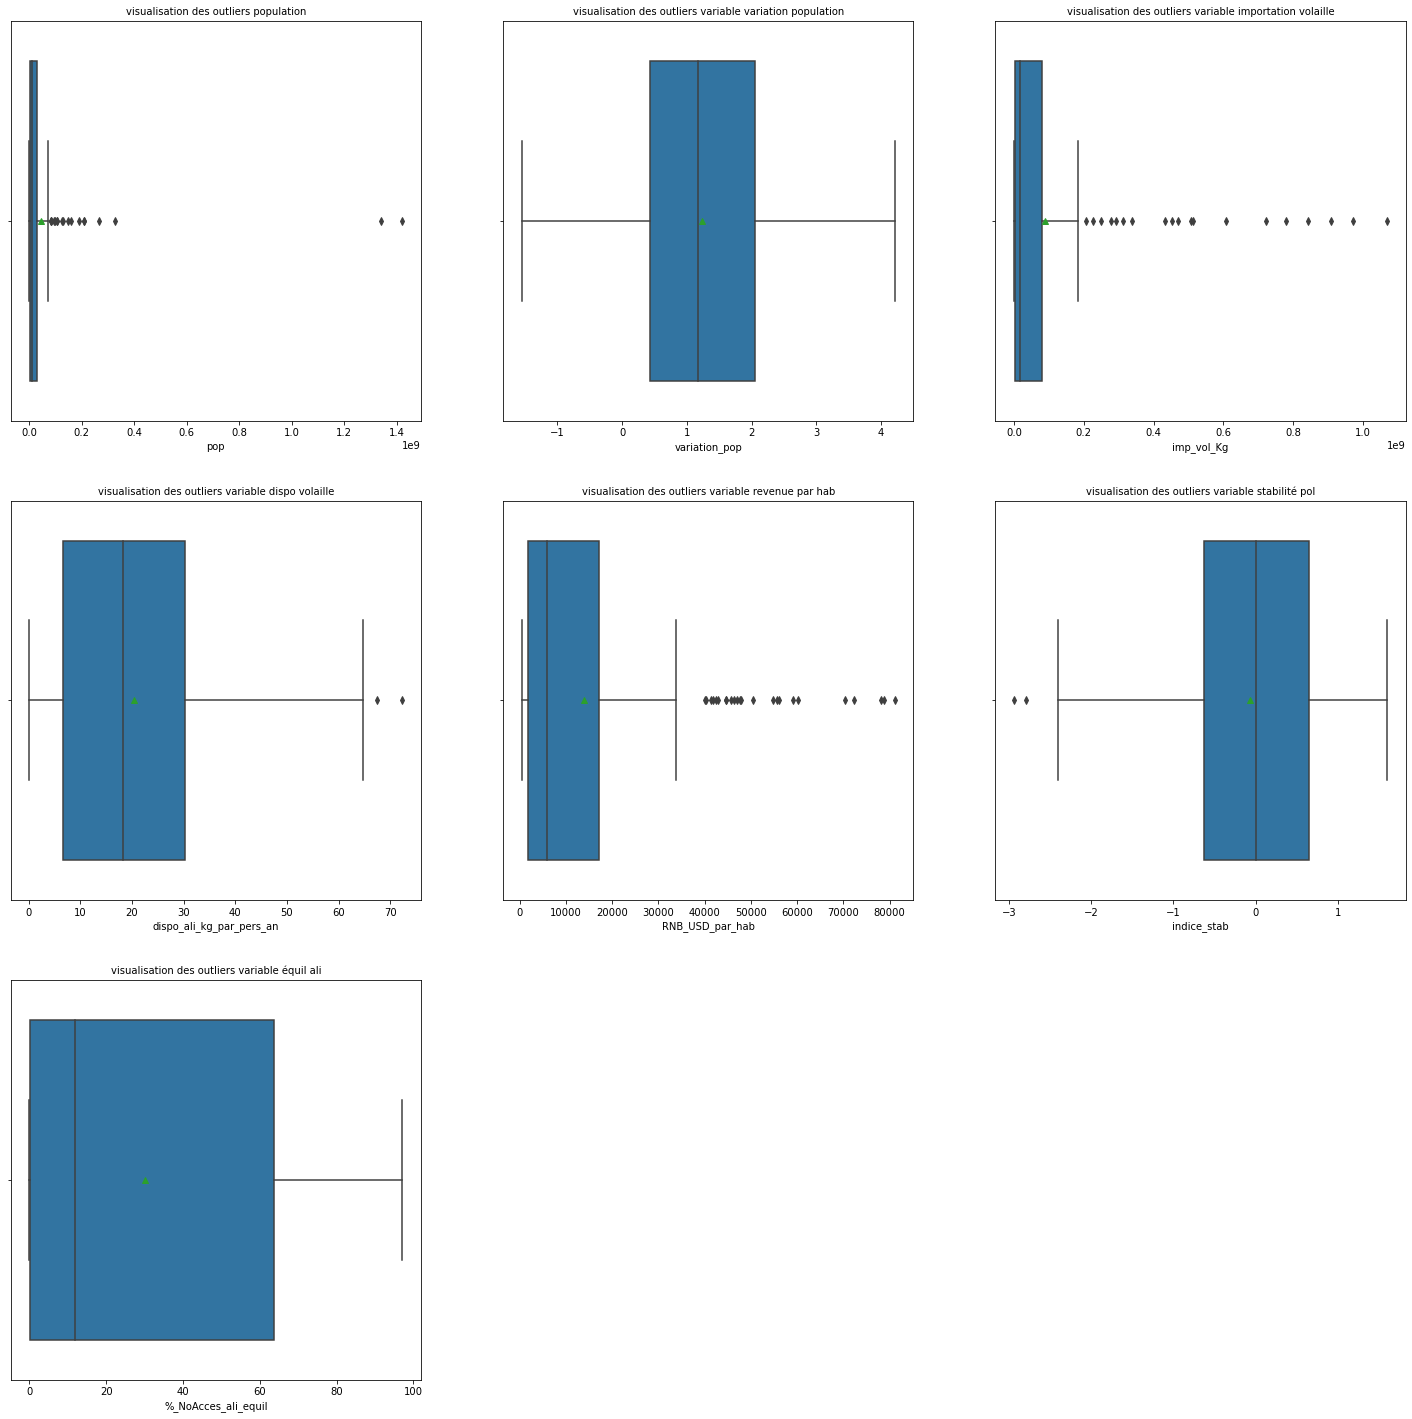

In [304]:
# visualisation en boxplot
plt.figure(figsize=(25,25))

plt.subplot(331)
sns.boxplot(data=df_complet, x="pop", showmeans=True)
plt.title("visualisation des outliers population", fontsize =10)

plt.subplot(332)
sns.boxplot(data=df_complet, x="variation_pop", showmeans=True)
plt.title("visualisation des outliers variable variation population", fontsize =10)


plt.subplot(333)
sns.boxplot(data=df_complet, x="imp_vol_Kg", showmeans=True)
plt.title("visualisation des outliers variable importation volaille", fontsize =10)

plt.subplot(334)
sns.boxplot(data=df_complet, x="dispo_ali_kg_par_pers_an", showmeans=True)
plt.title("visualisation des outliers variable dispo volaille", fontsize =10)

plt.subplot(335)
sns.boxplot(data=df_complet, x="RNB_USD_par_hab", showmeans=True)
plt.title("visualisation des outliers variable revenue par hab", fontsize =10)

plt.subplot(336)
sns.boxplot(data=df_complet, x="indice_stab", showmeans=True)
plt.title("visualisation des outliers variable stabilité pol", fontsize =10)

plt.subplot(337)
sns.boxplot(data=df_complet, x="%_NoAcces_ali_equil", showmeans=True)
plt.title("visualisation des outliers variable équil ali", fontsize =10)

plt.show()

## 10.2 Application du z-score sur la variable de la population pour détecter les valeurs abérrantes

In [305]:
# calculé la moyenne et l'écart type
mean = np.mean(df_complet['pop'])
std = np.std(df_complet['pop'])
# est considérer comme aberrant, les valeurs ayant un z-score supérieur à 2
seuil = 2
outlier = []
for i in df_complet['pop']:
    z = (i-mean)/std
    if np.abs(z) > seuil:
        outlier.append(i)
print('outlier selon le z-score:', outlier)
print('il y a', len(outlier), 'outlier')

outlier selon le z-score: [1421021791.0, 1338676785.0]
il y a 2 outlier


In [306]:
df_complet.loc[(df_complet['pop'] == 1421021791.0) |  (df_complet['pop'] == 1338676785.0)]

,Zone,pop,variation_pop,imp_vol_Kg,dispo_ali_kg_par_pers_an,RNB_USD_par_hab,indice_stab,%_NoAcces_ali_equil
44,"Chine, continentale",1.421022e+09,0.490664,452000000.0,12.33,8717.698270,0.00,14.3
84,Inde,1.338677e+09,1.057726,0.0,2.22,1916.967715,-0.76,74.9


Les outliers sont la Chine continentale et l'Inde.  
L'Inde n'importe pas de volaille.  
La Chine importe peu de volaille au regard de ça population totale et de la disponibilité en kilo par habitant et par an.  
Au regard de ses éléments les deux pays seront retirés du dataframe

In [307]:
df_complet.drop(index = [44, 84], inplace = True)
df_complet

,Zone,pop,variation_pop,imp_vol_Kg,dispo_ali_kg_par_pers_an,RNB_USD_par_hab,indice_stab,%_NoAcces_ali_equil
0,Afghanistan,36296113.0,2.515644,29000000.0,1.53,537.126294,-2.80,0.0
1,Afrique du Sud,57009756.0,1.406970,514000000.0,35.69,6537.504869,-0.28,65.2
2,Albanie,2884169.0,-0.078671,38000000.0,16.36,4532.791976,0.38,37.8
3,Algérie,41389189.0,2.024193,2000000.0,6.38,4081.775086,-0.92,35.2
4,Allemagne,82658409.0,0.562122,842000000.0,19.47,45734.557505,0.59,0.2
...,...,...,...,...,...,...,...,...
218,Émirats arabes unis,9487203.0,1.330455,433000000.0,43.47,42828.653410,0.62,0.0
219,Équateur,16785361.0,1.752986,0.0,19.31,6100.410171,-0.07,18.9
221,États-Unis d'Amérique,325084756.0,0.636376,123000000.0,55.68,60297.391594,0.29,2.0
222,Éthiopie,106399924.0,2.628256,1000000.0,0.13,705.544502,-1.68,88.3


In [308]:
df_complet.to_csv("df_complet.csv", index=False)